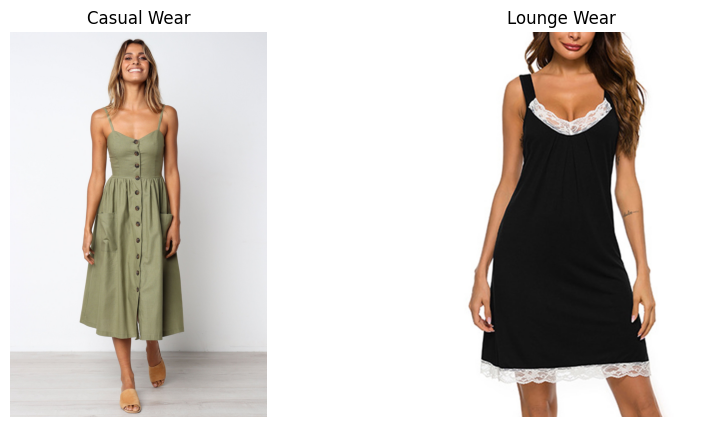

In [25]:
import cv2
import matplotlib.pyplot as plt

# Read images using OpenCV
casual = cv2.imread("casual.jpg")
lounge = cv2.imread("lounge.jpg")

# Convert images from BGR to RGB
casual_rgb = cv2.cvtColor(casual, cv2.COLOR_BGR2RGB)
lounge_rgb = cv2.cvtColor(lounge, cv2.COLOR_BGR2RGB)

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Display the first image
axs[0].imshow(casual_rgb)
axs[0].set_title("Casual Wear")
axs[0].axis('off')  # Hide axes

# Display the second image
axs[1].imshow(lounge_rgb)
axs[1].set_title("Lounge Wear")
axs[1].axis('off')  # Hide axes

# Show the plot
plt.show()


# Resizing

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
IM_SIZE = 512
# Resize images using TensorFlow (just height and width)
casual_resized = tf.image.resize(casual_rgb, size=(IM_SIZE, IM_SIZE))
lounge_resized = tf.image.resize(lounge_rgb, size=(IM_SIZE, IM_SIZE))

# Convert tensors back to numpy arrays for displaying with matplotlib
casual_resized_np = casual_resized.numpy().astype(int)
lounge_resized_np = lounge_resized.numpy().astype(int)

In [27]:
casual_resized.shape

TensorShape([512, 512, 3])

# Cropping

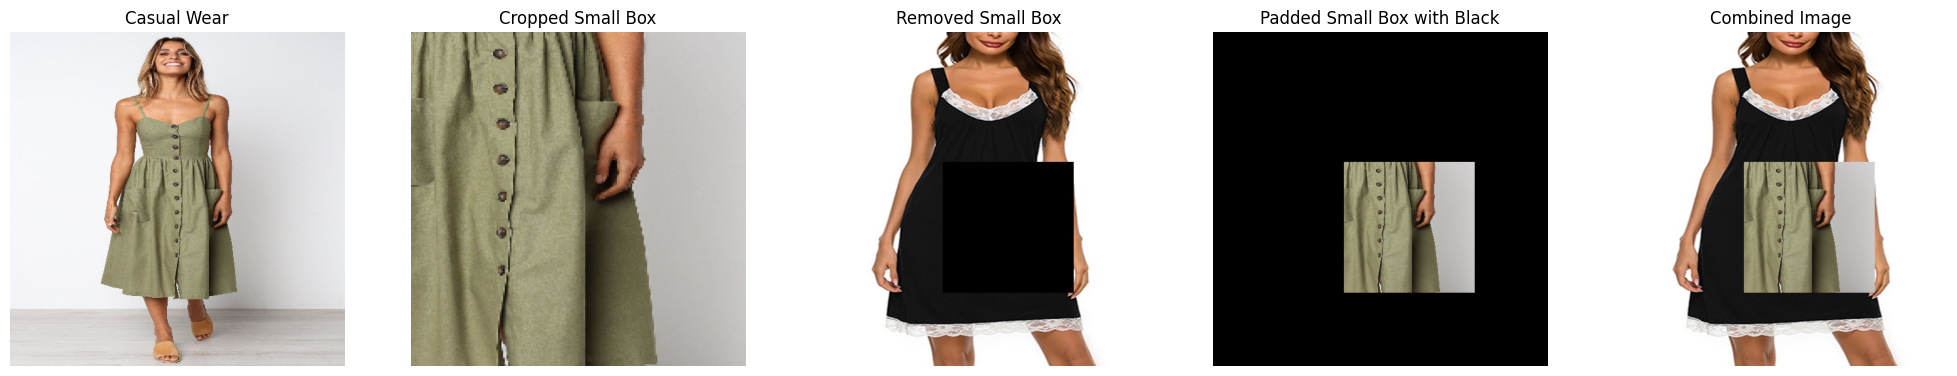

In [30]:
import numpy as np

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

# Display the original Casual image
axs[0].imshow(casual_resized_np)
axs[0].set_title("Casual Wear")
axs[0].axis('off')  # Hide axes

# Crop a small box from the Casual image
crop_y, crop_x, crop_h, crop_w = 200, 200, 200, 200  # Coordinates and size of the small box
casual_crop = tf.image.crop_to_bounding_box(casual_resized_np, crop_y, crop_x, crop_h, crop_w)

# Display the cropped small box
axs[1].imshow(casual_crop)
axs[1].set_title("Cropped Small Box")
axs[1].axis('off')  # Hide axes

# Pad the cropped box back into its original location with black padding
casual_padded = tf.image.pad_to_bounding_box(casual_crop, crop_y, crop_x, IM_SIZE, IM_SIZE)

# Create a mask that will "remove" the cropped small box from the original image
mask = np.ones_like(casual_resized_np) * 255  # Create a white mask
mask[crop_y:crop_y+crop_h, crop_x:crop_x+crop_w] = 0  # Set the small box region to black

# Apply the mask to the original image, filling the cropped region with black
lounge_removed_crop = np.where(mask == 0, 0, lounge_resized_np)

# Display the image with the cropped small box removed (black region)
axs[2].imshow(lounge_removed_crop)
axs[2].set_title("Removed Small Box")
axs[2].axis('off')  # Hide axes

# Display the padded image (cropped small box padded back with black)
axs[3].imshow(casual_padded)
axs[3].set_title("Padded Small Box with Black")
axs[3].axis('off')  # Hide axes

# Combine the lounge_removed_crop and casual_padded images
combined_image = lounge_removed_crop + casual_padded

# Display the combined image
axs[4].imshow(combined_image)
axs[4].set_title("Combined Image")
axs[4].axis('off')  # Hide axes

# Show the plot
plt.show()